<a href="https://colab.research.google.com/github/Anuj2615/Anuj2615/blob/main/Sales_forecasting_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv(r"/content/Walmart_Sales.csv",encoding='Latin')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.set_index('Date', inplace=True)
df = df.sort_index()


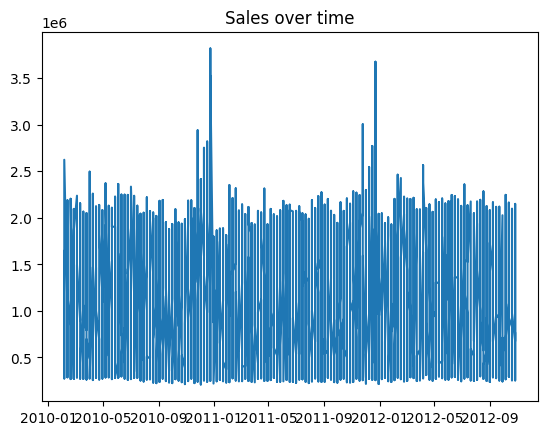

In [ ]:
plt.plot(df.index, df['Weekly_Sales'])
plt.title("Sales over time")
plt.show()

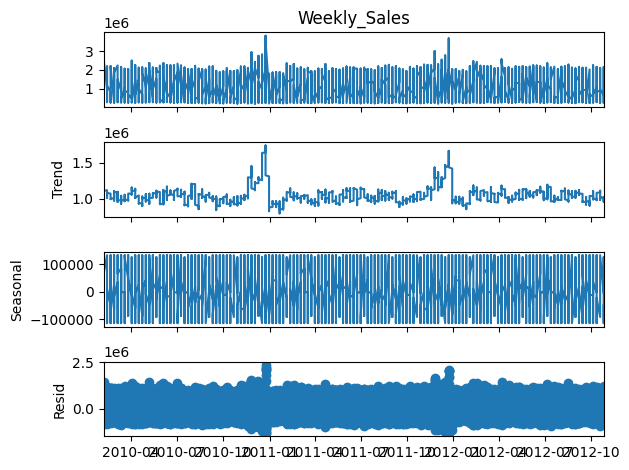

In [ ]:
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive',period=52)
decomposition.plot()
plt.show()


In [ ]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
model = ARIMA(train['Weekly_Sales'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
print(forecast)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


6423    9.990372e+05
6424    1.006019e+06
6425    1.006120e+06
6426    1.006121e+06
6427    1.006121e+06
6428    1.006121e+06
6429    1.006121e+06
6430    1.006121e+06
6431    1.006121e+06
6432    1.006121e+06
6433    1.006121e+06
6434    1.006121e+06
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


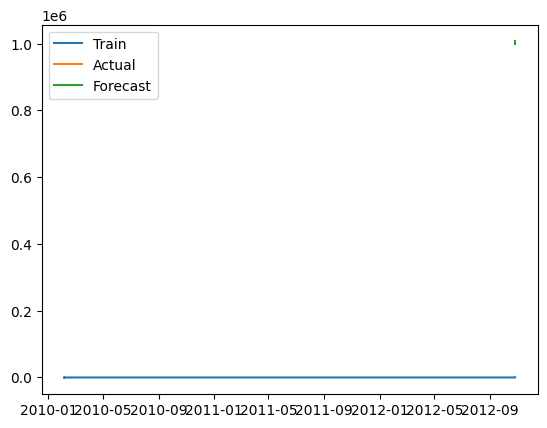

In [ ]:
plt.plot(train.index, train['Fuel_Price'], label='Train')
plt.plot(test.index, test['Fuel_Price'], label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(test['Fuel_Price	'], forecast)
rmse = np.sqrt(mean_squared_error(test['Fuel_Price	'], forecast))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 741136.5320612978
RMSE: 741137.2671303635
